In [2]:
#import the module we need 
from sklearn import tree 
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split as tts 

In [3]:
# load data 
wine = load_wine() 

In [4]:
# check the data shape 
wine.data.shape 

(178, 13)

In [6]:
wine.target.shape  

(178,)

In [7]:
# transform to the dataframe  if do not like numpy format 
import pandas as pd 
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# feature_names 
wine.feature_names 

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
# target_names
wine.target_names 

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
# train test split 
Xtrain,Xtest,Ytrain,Ytest = tts(wine.data,wine.target
                                ,test_size=0.3
                                ,random_state = 420)  

In [12]:
# model establishment and see the accuracy of the model
clf = tree.DecisionTreeClassifier(criterion = 'entropy').fit(Xtrain,Ytrain)  
clf.score(Xtest,Ytest) 

0.9629629629629629

In [16]:
# lets see the accuacy for criterion = 'entropy' and criterion = 'gini' 
criterion = ['entropy','gini'] 

for criterion in criterion: 
    clf = tree.DecisionTreeClassifier(criterion = criterion).fit(Xtrain,Ytrain) 
    acc = clf.score(Xtest,Ytest)
    print('when the criterion is {}, the accuracy of the model is {}'.format(criterion,acc))    

when the criterion is entropy, the accuracy of the model is 0.9629629629629629
when the criterion is gini, the accuracy of the model is 0.9444444444444444


It seems when criterion is **entropy**, the accuracy of the model is better 

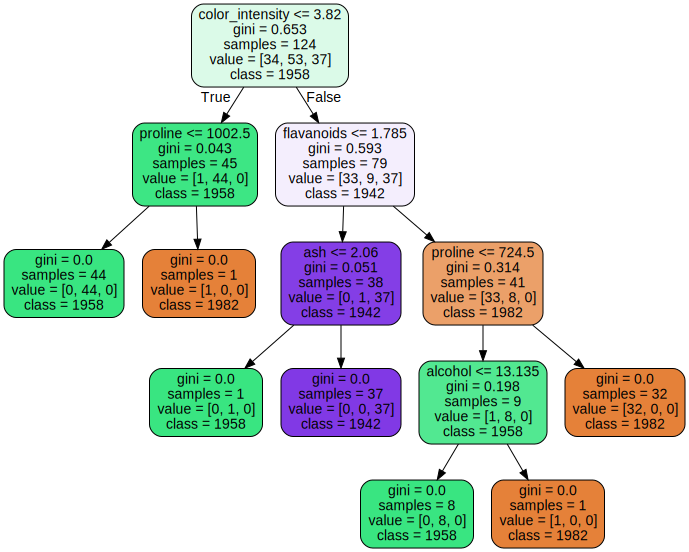

In [18]:
# Draw a tree 
feature_names = wine.feature_names  

import graphviz 
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names = feature_names 
                                ,class_names = ['1982','1958','1942'] # class_name,you can try anything you want 
                                ,filled = True 
                                ,rounded = True) 
graph = graphviz.Source(dot_data) 
graph 

In [19]:
# feature_importance 
clf.feature_importances_ 

array([0.02195225, 0.        , 0.02404637, 0.        , 0.        ,
       0.        , 0.39557682, 0.        , 0.        , 0.39720941,
       0.        , 0.        , 0.16121515])

In [21]:
[*zip(feature_names,clf.feature_importances_)] 

[('alcohol', 0.02195224501537985),
 ('malic_acid', 0.0),
 ('ash', 0.024046373651715403),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.3955768217709794),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.39720941385141617),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.16121514571050916)]

In [26]:
# show the feature importance as a dataframe order by feature_importance 
df_feature_importances = pd.DataFrame(data = [*zip(feature_names,clf.feature_importances_)] 
                                      ,columns = ['feature_name','feature_importance']).sort_values(by = ['feature_importance']
                                                                                                    ,ascending = False) 
df_feature_importances.index = range(df_feature_importances.shape[0]) # reorder the index 
df_feature_importances 

,feature_name,feature_importance
0,color_intensity,0.397209
1,flavanoids,0.395577
2,proline,0.161215
3,ash,0.024046
4,alcohol,0.021952
5,malic_acid,0.000000
6,alcalinity_of_ash,0.000000
7,magnesium,0.000000
8,total_phenols,0.000000
9,nonflavanoid_phenols,0.000000


In [29]:
#剪枝 
#防止过拟合 
# max_depth : 树的最大深度，超过这个深度剪掉
#min_sample_split & min_sample_leaf: min_samples_leaf限定，
#一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分
#枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生
#一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引
#起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很大，
#建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题
#中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择。
#min_samples_split:，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。 

# re-build model 
clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                  ,max_depth = 5
                                  ,min_samples_leaf = 10
                                  ,min_samples_split = 10 
                                  ,random_state = 420
                                  ,splitter = 'random').fit(Xtrain,Ytrain) 


In [30]:
# model performance on test set  
# seems worse than before 
clf.score(Xtest,Ytest)  

0.9074074074074074

In [31]:
#see the model performance on train set 
clf.score(Xtrain,Ytrain) 

0.9112903225806451

In [32]:
# max_features & min_impurity_decrease 
#max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，
#max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量
#而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型
#学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。
#min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分枝不会发生。

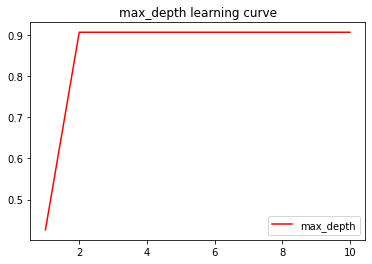

In [38]:
# try to use learning curve tuning hyperparameter 'max_depth'
import matplotlib.pyplot as plt 

test_performance = []  

for i in range(1,11): 
    clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                  ,max_depth = i 
                                  ,min_samples_leaf = 10
                                  ,min_samples_split = 10 
                                  ,random_state = 420
                                  ,splitter = 'random').fit(Xtrain,Ytrain)  
    score = clf.score(Xtest,Ytest) 
    test_performance.append(score) 

# draw the learning curve 
plt.plot(range(1,11),test_performance,color = 'red',label = 'max_depth') 
plt.title(label = 'max_depth learning curve') 
plt.legend() 
plt.show() 

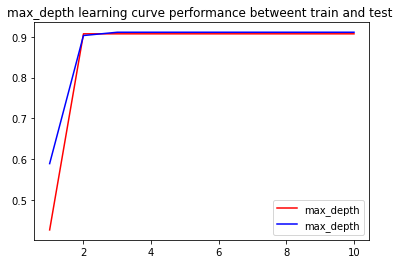

In [40]:
## try to compare the performance between train set and test set 
test_performance = []  
train_performance = [] 

for i in range(1,11): 
    clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                  ,max_depth = i 
                                  ,min_samples_leaf = 10
                                  ,min_samples_split = 10 
                                  ,random_state = 420
                                  ,splitter = 'random').fit(Xtrain,Ytrain)  
    score_test = clf.score(Xtest,Ytest) 
    test_performance.append(score_test)   
    
    score_train = clf.score(Xtrain,Ytrain) 
    train_performance.append(score_train)
    

# draw the learning curve 
plt.plot(range(1,11),test_performance,color = 'red',label = 'max_depth') 
plt.plot(range(1,11),train_performance,color = 'blue',label = 'max_depth') 
plt.title(label = 'max_depth learning curve performance betweent train and test ') 
plt.legend() 
plt.show()  

In [43]:
# try to find the value of max_depth when test performance is better than train performance 
for i in range(1,11): 
    clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                  ,max_depth = i 
                                  ,min_samples_leaf = 10
                                  ,min_samples_split = 10 
                                  ,random_state = 420
                                  ,splitter = 'random').fit(Xtrain,Ytrain)   
    
    score_test = clf.score(Xtest,Ytest) 
    score_train = clf.score(Xtrain,Ytrain)   
    
    if score_test > score_train:   
        print('the value of max_depth is {}, and the score of the model on test is {},the score of the model on train is {}'.format(i ,round(score_test,3),round(score_train,3)))
    else: 
        continue  
    
    

the value of max_depth is 2, and the score of the model on test is 0.907,the score of the model on train is 0.903
